## Air Quality Dataset:

### ARPA data 
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [50]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import calendar

### Reading Torino Rebaudengo Station NOx

In [51]:
def read_ARPA_csv(path):
    dataFrame = pd.read_csv(path, sep=';',dtype={'Data rilevamento': str, 'Ora':str},index_col=False ) 

    #merge date and hours and parsing
    dataFrame["Data rilevamento"] = dataFrame["Data rilevamento"] + " " +  dataFrame["Ora"]
    dataFrame["Data rilevamento"] = pd.to_datetime(dataFrame["Data rilevamento"], format='%d/%m/%Y %H:%M') 
    return dataFrame

In [52]:
to_rebaudengo_gas = read_ARPA_csv('data/ARPA/NOx/Rebaudengo/Torino-Rebaudengo_Gas_2020-01-01_2020-12-31.csv')
to_rebaudengo_gas[(to_rebaudengo_gas['Data rilevamento'] >= '2020-02-29') & (to_rebaudengo_gas['Data rilevamento'] < '2020-03-02') ]

,Data rilevamento,Ora,Id Rete Monitoraggio,Codice Istat Comune,Progr. Punto Comune,Denominazione Stazione,Id Parametro,Descr. Parametro,Id Un. misura,Descr. Un. misura,Valore,Stato
1416,2020-02-29 01:00:00,01:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,126.0,V
1417,2020-02-29 02:00:00,02:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,150.0,V
1418,2020-02-29 03:00:00,03:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,115.0,V
1419,2020-02-29 04:00:00,04:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,95.0,V
1420,2020-02-29 05:00:00,05:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,99.0,V
1421,2020-02-29 06:00:00,06:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,104.0,V
1422,2020-02-29 07:00:00,07:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,184.0,V
1423,2020-02-29 08:00:00,08:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,171.0,V
1424,2020-02-29 09:00:00,09:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,162.0,V
1425,2020-02-29 10:00:00,10:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,191.0,V


### Line plot

Text(0.5, 1.0, 'Torino Rebaudengo $NO_{x}$ - Hourly Data')

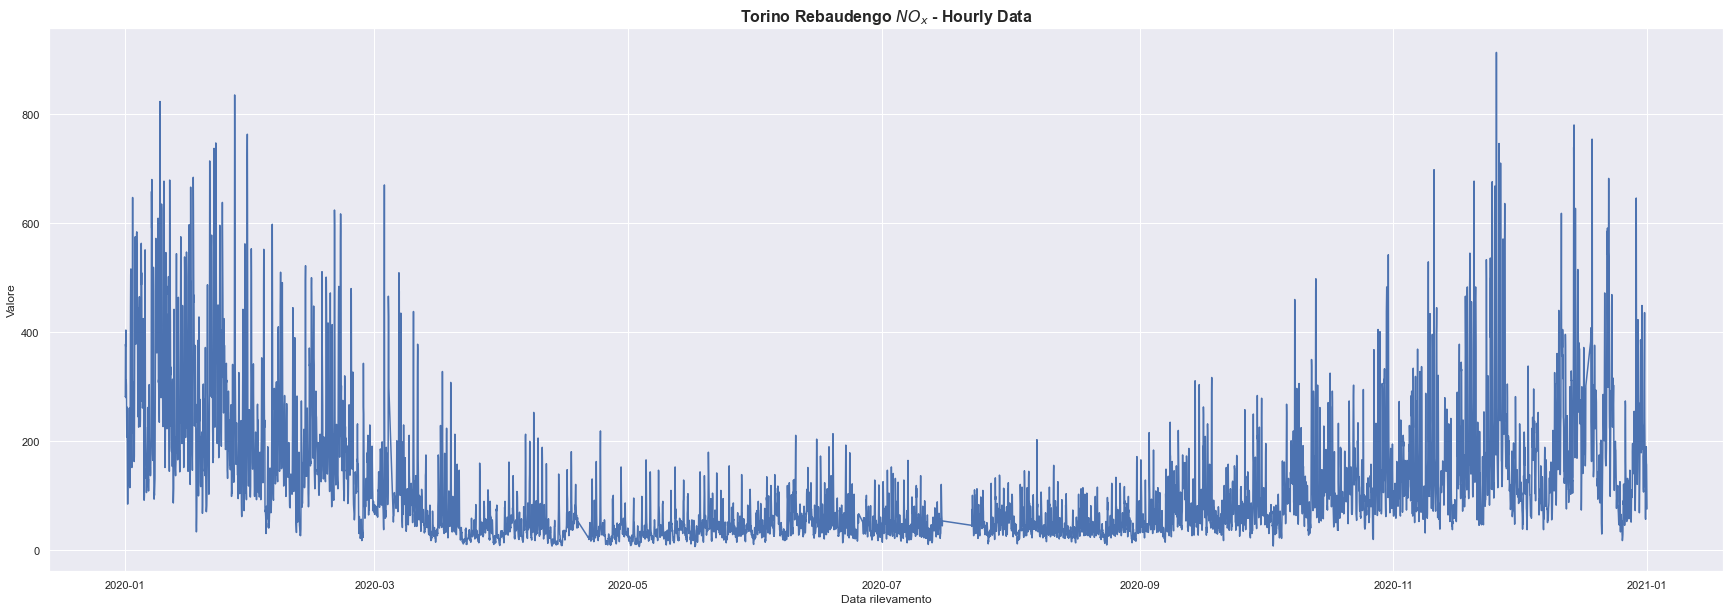

In [53]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=to_rebaudengo_gas, x="Data rilevamento", y="Valore")
plt.title("Torino Rebaudengo $NO_{x}$ - Hourly Data",fontdict= { 'fontsize': 16, 'fontweight':'bold'})

### Group by Day

In [54]:
to_rebaudengo_gas_daily = to_rebaudengo_gas.resample('D', on='Data rilevamento').mean()
to_rebaudengo_gas_daily

,Id Rete Monitoraggio,Codice Istat Comune,Progr. Punto Comune,Id Parametro,Id Un. misura,Valore
Data rilevamento,,,,,,
2020-01-01,13.0,1272.0,805.0,22.0,23.0,228.291667
2020-01-02,13.0,1272.0,805.0,22.0,23.0,293.125000
2020-01-03,13.0,1272.0,805.0,22.0,23.0,412.041667
2020-01-04,13.0,1272.0,805.0,22.0,23.0,350.500000
2020-01-05,13.0,1272.0,805.0,22.0,23.0,290.250000
...,...,...,...,...,...,...
2020-12-27,13.0,1272.0,805.0,22.0,23.0,94.125000
2020-12-28,13.0,1272.0,805.0,22.0,23.0,137.875000
2020-12-29,13.0,1272.0,805.0,22.0,23.0,269.166667


Text(0.5, 1.0, 'Torino Rebaudengo $NO_{x}$ - Daily Data')

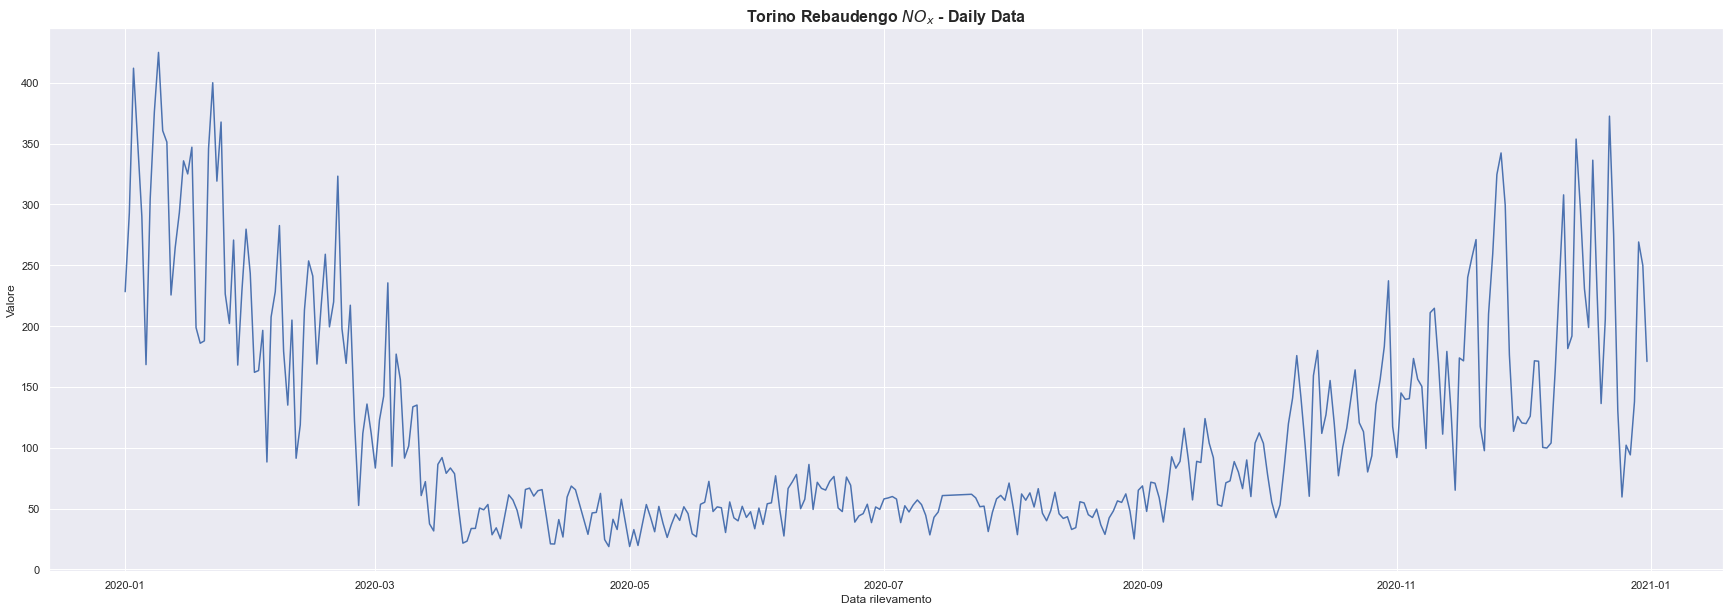

In [55]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=to_rebaudengo_gas_daily, x="Data rilevamento", y="Valore")
plt.title("Torino Rebaudengo $NO_{x}$ - Daily Data",fontdict= { 'fontsize': 16, 'fontweight':'bold'})

### Creating baseline 
Based on 3 Jan to 6 Feb time period

In [56]:
reference_period = to_rebaudengo_gas[(to_rebaudengo_gas['Data rilevamento'] >= '2020-01-03') & (to_rebaudengo_gas['Data rilevamento'] < '2020-02-06')]
basevalue = reference_period['Valore'].mean()
adjusted_data = to_rebaudengo_gas_daily[(to_rebaudengo_gas_daily.index.get_level_values('Data rilevamento') >= '2020-02-15')]
adjusted_data -= basevalue
adjusted_data


,Id Rete Monitoraggio,Codice Istat Comune,Progr. Punto Comune,Id Parametro,Id Un. misura,Valore
Data rilevamento,,,,,,
2020-02-15,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-32.228884
2020-02-16,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-104.562217
2020-02-17,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-57.145551
2020-02-18,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-14.270551
2020-02-19,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-73.978884
...,...,...,...,...,...,...
2020-12-27,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-179.228884
2020-12-28,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-135.478884
2020-12-29,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-4.187217


Text(0.5, 1.0, 'Torino Rebaudengo $NO_{x}$ - Deviation from Baseline')

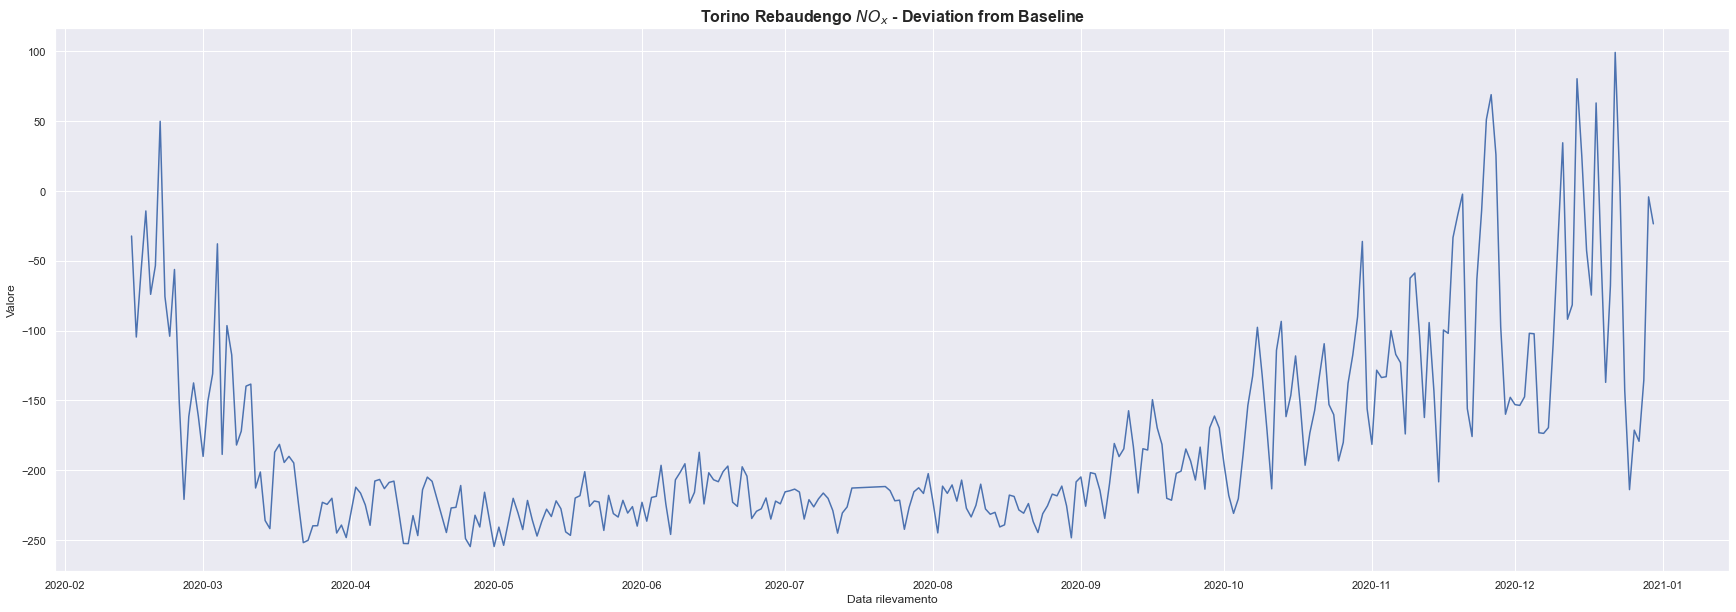

In [57]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=adjusted_data[(adjusted_data.index.get_level_values('Data rilevamento') >= '2020-02-15') & (adjusted_data.index.get_level_values('Data rilevamento') < '2020-12-31')], x="Data rilevamento", y="Valore")
plt.title("Torino Rebaudengo $NO_{x}$ - Deviation from Baseline",fontdict= { 'fontsize': 16, 'fontweight':'bold'})

### Utility Functions

In [58]:
def get_daily_adjusted_data(basePath, year):
  yearly_data = []

  #getting all the dataset
  for x in range(2012, 2020):
    data = get_daily_data(basePath +'_' + str(x) + '-01-01_' + str(x) + '-12-31.csv',str(x) + '-01-01 ')[['Data rilevamento','Valore']]
    #take only the day of the year
    data['Data rilevamento']= data['Data rilevamento'].dt.dayofyear
    yearly_data.append(data)

  #create daily baseline
  avg_daily_baseline=pd.concat([yearly_data[0],yearly_data[1],yearly_data[2],yearly_data[3],yearly_data[4],yearly_data[5],yearly_data[6],yearly_data[7]]).groupby('Data rilevamento', as_index=True).mean()
  avg_daily_baseline.reset_index(inplace = True)

  if not calendar.isleap(int(year)):
    avg_daily_baseline = avg_daily_baseline[(avg_daily_baseline['Data rilevamento'] != 60)] # this removes Feb, 29
  
  #get yearly data
  yearly_data = get_daily_data(basePath + '_' + year + '-01-01_' + year + '-12-31.csv', year + '-01-01')[['Data rilevamento','Valore']]
  yearly_data['Giorno']= yearly_data['Data rilevamento'].dt.dayofyear

  #calculate percentage deviation
  return_data = yearly_data
  return_data['Valore'] = ((yearly_data['Valore']-avg_daily_baseline['Valore'])/avg_daily_baseline['Valore'])*100

  #resetting index
  return_data.set_index('Data rilevamento')
  
  #remove nan column and useless column
  return_data.dropna(inplace=True)
  del return_data['Giorno']
  if 'Id Un. misura' in return_data.columns:
    del return_data['Id Un. misura']
  
  return return_data

def get_daily_data(path,start_date):
    initial_data=read_ARPA_csv(path)
    #group by day
    data_daily = initial_data.resample('D', on='Data rilevamento').mean()
    data_daily = data_daily[(data_daily.index.get_level_values('Data rilevamento') >= start_date)]     
    data_daily.reset_index(inplace=True)

    return data_daily

### Reading Torino Consolata Station

#### NO2

In [59]:
to_consolata_2019_no2 = read_ARPA_csv('data/ARPA/NO2/Consolata/Torino-Consolata_Biossido_2019-01-01_2019-12-31.csv')[['Data rilevamento', 'Valore']]
to_consolata_2020_no2 = read_ARPA_csv('data/ARPA/NO2/Consolata/Torino-Consolata_Biossido_2020-01-01_2020-12-31.csv')[['Data rilevamento', 'Valore']]

#rename value column
to_consolata_2019_no2.rename(columns = {'Valore':'Valore 2019'}, inplace = True)
to_consolata_2020_no2.rename(columns = {'Valore':'Valore 2020'}, inplace = True)
#group by week
to_consolata_2019_no2 = to_consolata_2019_no2.resample('W', on='Data rilevamento').mean()
to_consolata_2020_no2 = to_consolata_2020_no2.resample('W', on='Data rilevamento').mean()
# #creating grouped data
to_consolata_2019_no2['Data']=to_consolata_2019_no2.index.get_level_values('Data rilevamento').strftime('%U/%m')
to_consolata_2020_no2['Data']=to_consolata_2020_no2.index.get_level_values('Data rilevamento').strftime('%U/%m')
#merge data
merged_consolata_no2 = pd.merge(to_consolata_2019_no2 ,to_consolata_2020_no2 ,on=['Data','Data'])
merged_consolata_no2.set_index("Data",inplace=True)


#### NO2 - 2019 vs 2020    

Text(0, 0.5, 'Value')

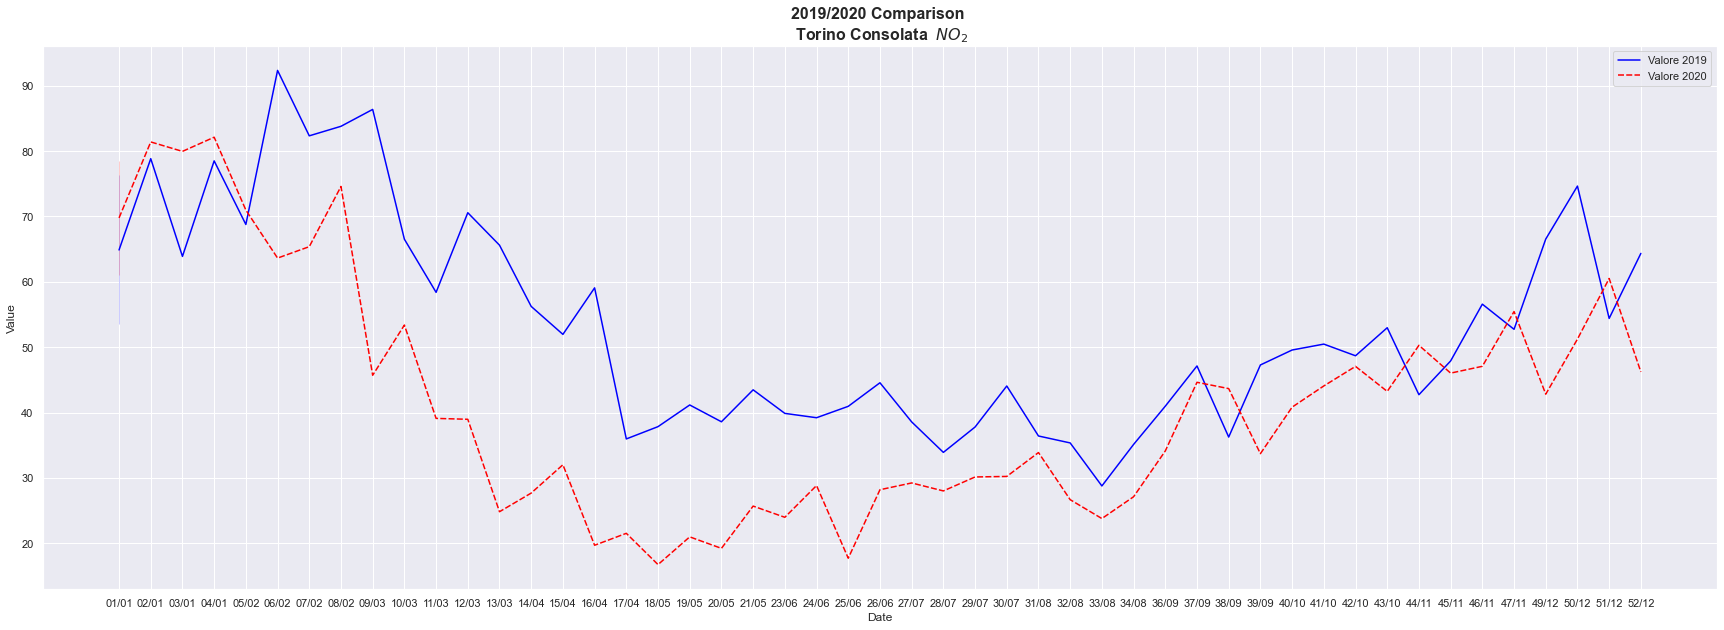

In [60]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_no2, palette=palette)
plt.title("2019/2020 Comparison \n Torino Consolata  $NO_{2}$",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Date')
plt.ylabel('Value')

#### NOx

In [61]:
to_consolata_2019_nox = read_ARPA_csv('data/ARPA/NOx/Consolata/Torino-Consolata_Gas_2019-01-01_2019-12-31.csv')[['Data rilevamento', 'Valore']]
to_consolata_2020_nox = read_ARPA_csv('data/ARPA/NOx/Consolata/Torino-Consolata_Gas_2020-01-01_2020-12-31.csv')[['Data rilevamento', 'Valore']]

#rename value column
to_consolata_2019_nox.rename(columns = {'Valore':'Valore 2019'}, inplace = True)
to_consolata_2020_nox.rename(columns = {'Valore':'Valore 2020'}, inplace = True)
#group by week
to_consolata_2019_nox = to_consolata_2019_nox.resample('W', on='Data rilevamento').mean()
to_consolata_2020_nox = to_consolata_2020_nox.resample('W', on='Data rilevamento').mean()
# #creating grouped data
to_consolata_2019_nox['Data']=to_consolata_2019_nox.index.get_level_values('Data rilevamento').strftime('%U/%m')
to_consolata_2020_nox['Data']=to_consolata_2020_nox.index.get_level_values('Data rilevamento').strftime('%U/%m')
#merge data
merged_consolata_nox = pd.merge(to_consolata_2019_nox ,to_consolata_2020_nox ,on=['Data','Data'])
merged_consolata_nox.set_index("Data",inplace=True)


#### NOx - 2019 vs 2020    

Text(0, 0.5, 'Value')

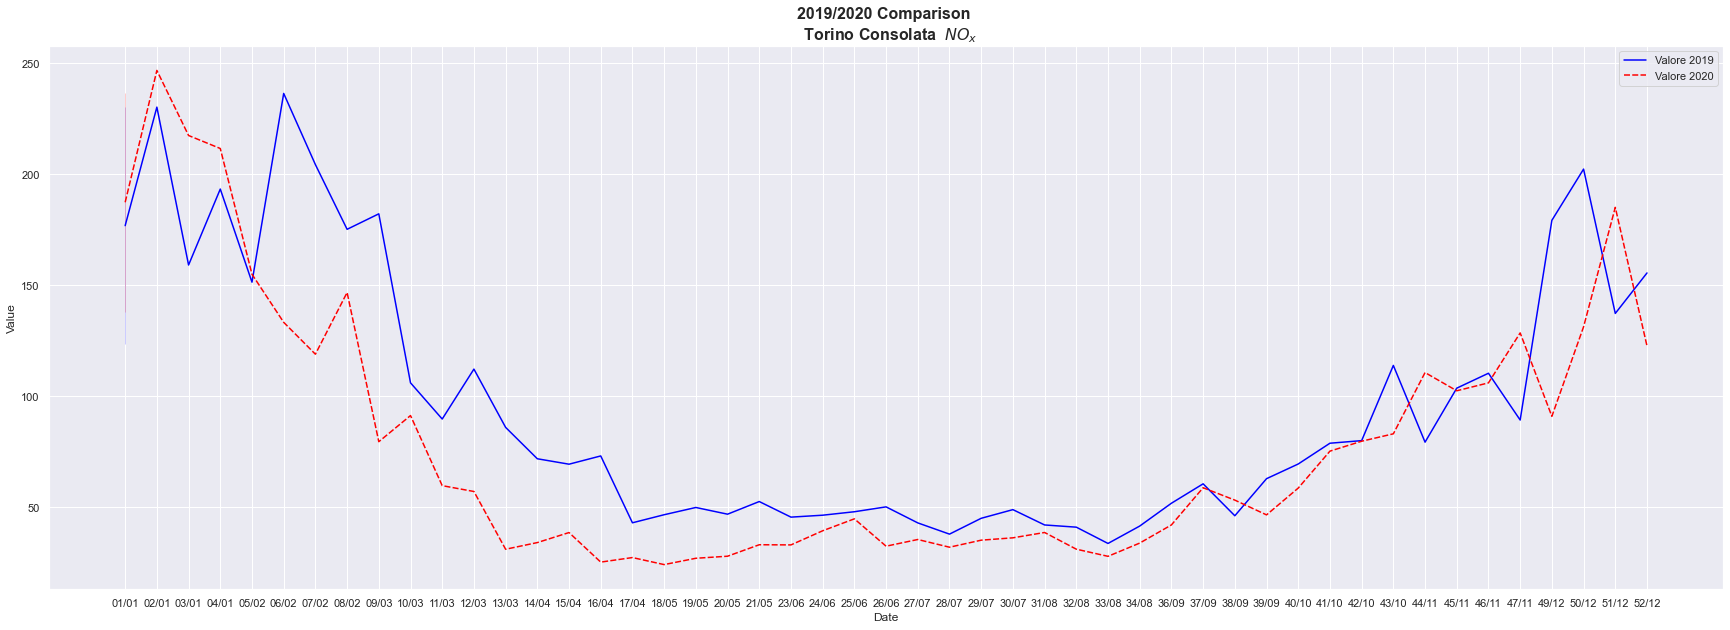

In [62]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_nox, palette=palette)
plt.title("2019/2020 Comparison \n  Torino Consolata  $NO_{x}$",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Date')
plt.ylabel('Value')

#### NO

In [63]:
to_consolata_2019_no = read_ARPA_csv('data/ARPA/NO/Consolata/Torino-Consolata_Monossido_2019-01-01_2019-12-31.csv')[['Data rilevamento', 'Valore']]
to_consolata_2020_no = read_ARPA_csv('data/ARPA/NO/Consolata/Torino-Consolata_Monossido_2020-01-01_2020-12-31.csv')[['Data rilevamento', 'Valore']]

#rename value column
to_consolata_2019_no.rename(columns = {'Valore':'Valore 2019'}, inplace = True)
to_consolata_2020_no.rename(columns = {'Valore':'Valore 2020'}, inplace = True)
#group by week
to_consolata_2019_no = to_consolata_2019_no.resample('W', on='Data rilevamento').mean()
to_consolata_2020_no = to_consolata_2020_no.resample('W', on='Data rilevamento').mean()
# #creating grouped data
to_consolata_2019_no['Data']=to_consolata_2019_no.index.get_level_values('Data rilevamento').strftime('%U/%m')
to_consolata_2020_no['Data']=to_consolata_2020_no.index.get_level_values('Data rilevamento').strftime('%U/%m')
#merge data
merged_consolata_no = pd.merge(to_consolata_2019_no ,to_consolata_2020_no ,on=['Data','Data'])
merged_consolata_no.set_index("Data",inplace=True)

#### NO - 2019 vs 2020    

Text(0, 0.5, 'Value')

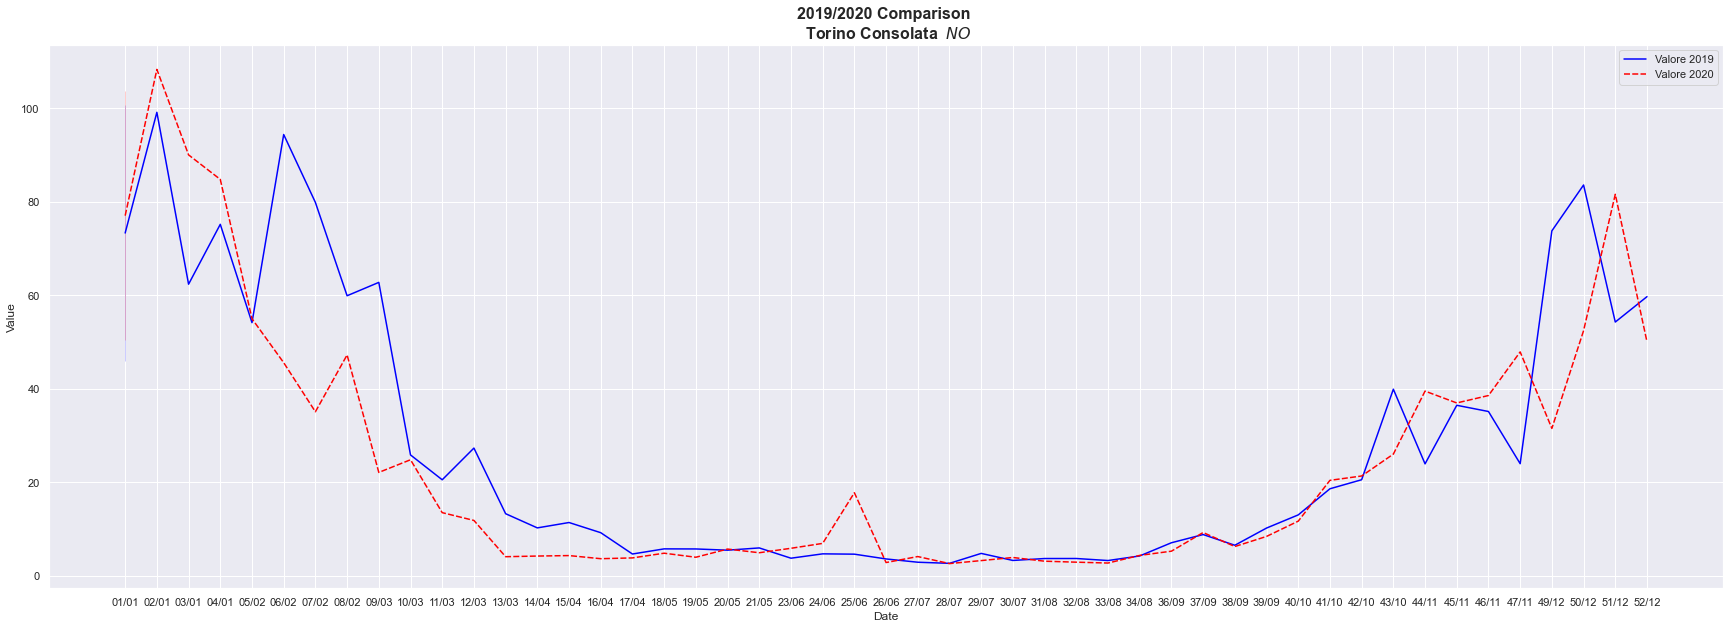

In [64]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_no, palette=palette)
plt.title("2019/2020 Comparison \n Torino Consolata  $NO$",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Date')
plt.ylabel('Value')

#### PM10

In [65]:
to_consolata_2019_pm10 = read_ARPA_csv('data/ARPA/PM10/Consolata/Torino-Consolata_Polveri-sottili_2019-01-01_2019-12-31.csv')[['Data rilevamento', 'Valore']]
to_consolata_2020_pm10 = read_ARPA_csv('data/ARPA/PM10/Consolata/Torino-Consolata_Polveri-sottili_2020-01-01_2020-12-31.csv')[['Data rilevamento', 'Valore']]

#rename value column
to_consolata_2019_pm10.rename(columns = {'Valore':'Valore 2019'}, inplace = True)
to_consolata_2020_pm10.rename(columns = {'Valore':'Valore 2020'}, inplace = True)
#group by week
to_consolata_2019_pm10 = to_consolata_2019_pm10.resample('W', on='Data rilevamento').mean()
to_consolata_2020_pm10 = to_consolata_2020_pm10.resample('W', on='Data rilevamento').mean()
# #creating grouped data
to_consolata_2019_pm10['Data']=to_consolata_2019_pm10.index.get_level_values('Data rilevamento').strftime('%U/%m')
to_consolata_2020_pm10['Data']=to_consolata_2020_pm10.index.get_level_values('Data rilevamento').strftime('%U/%m')
#merge data
merged_consolata_pm10 = pd.merge(to_consolata_2019_pm10 ,to_consolata_2020_pm10 ,on=['Data','Data'])
merged_consolata_pm10.set_index("Data",inplace=True)

#### PM10 - 2019 vs 2020    

Text(0, 0.5, 'Value')

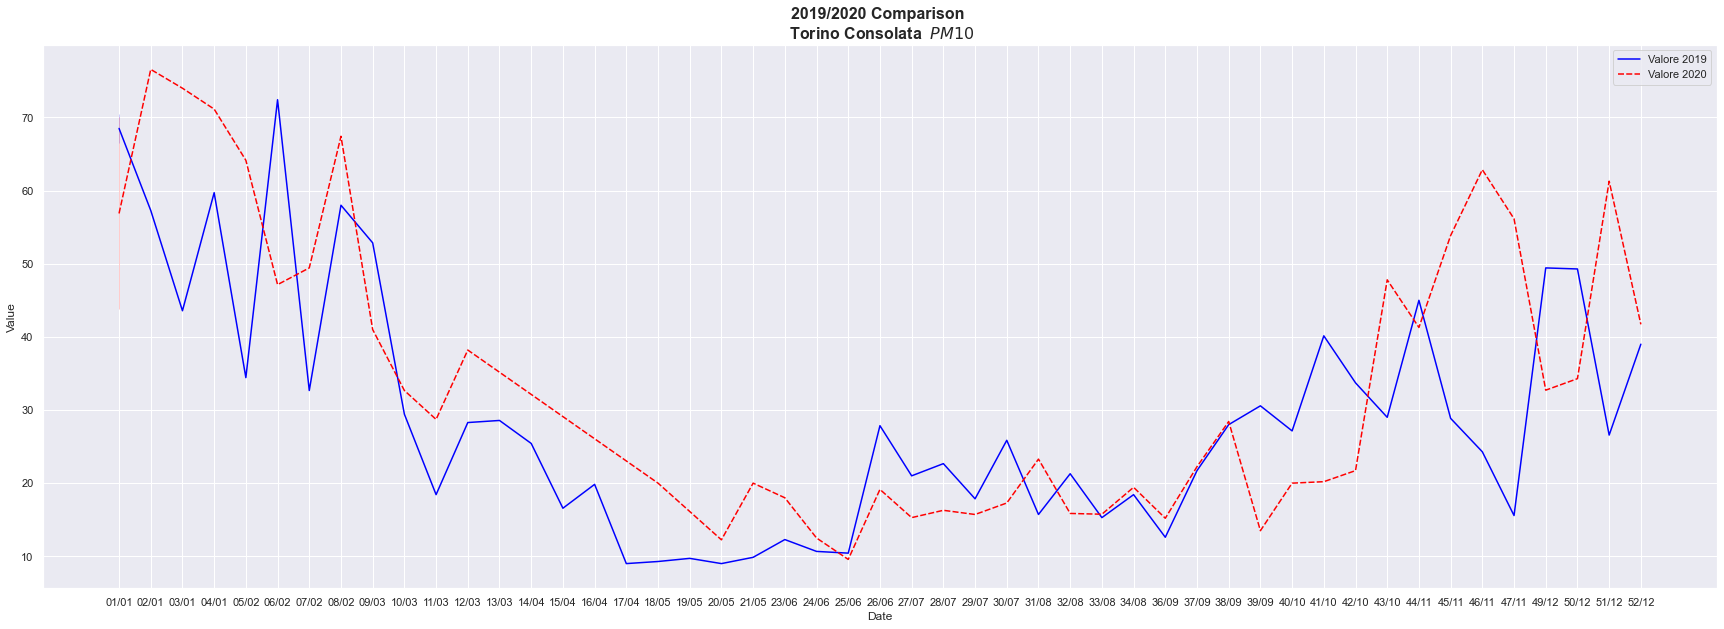

In [66]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_pm10, palette=palette)
plt.title("2019/2020 Comparison \n Torino Consolata  $PM10$",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Date')
plt.ylabel('Value')

#### Benzene

In [67]:
to_consolata_2019_benzene = read_ARPA_csv('data/ARPA/Benzene/Consolata/Torino-Consolata_Idrocarburi-aromatici_2019-01-01_2019-12-31.csv')[['Data rilevamento', 'Valore']]
to_consolata_2020_benzene = read_ARPA_csv('data/ARPA/Benzene/Consolata/Torino-Consolata_Idrocarburi-aromatici_2020-01-01_2020-12-31.csv')[['Data rilevamento', 'Valore']]

#rename value column
to_consolata_2019_benzene.rename(columns = {'Valore':'Valore 2019'}, inplace = True)
to_consolata_2020_benzene.rename(columns = {'Valore':'Valore 2020'}, inplace = True)
#group by week
to_consolata_2019_benzene = to_consolata_2019_benzene.resample('W', on='Data rilevamento').mean()
to_consolata_2020_benzene = to_consolata_2020_benzene.resample('W', on='Data rilevamento').mean()
# #creating grouped data
to_consolata_2019_benzene['Data']=to_consolata_2019_benzene.index.get_level_values('Data rilevamento').strftime('%U/%m')
to_consolata_2020_benzene['Data']=to_consolata_2020_benzene.index.get_level_values('Data rilevamento').strftime('%U/%m')
#merge data
merged_consolata_benzene = pd.merge(to_consolata_2019_benzene ,to_consolata_2020_benzene ,on=['Data','Data'])
merged_consolata_benzene.set_index("Data",inplace=True)

#### Benzene - 2019 vs 2020    

Text(0, 0.5, 'Value')

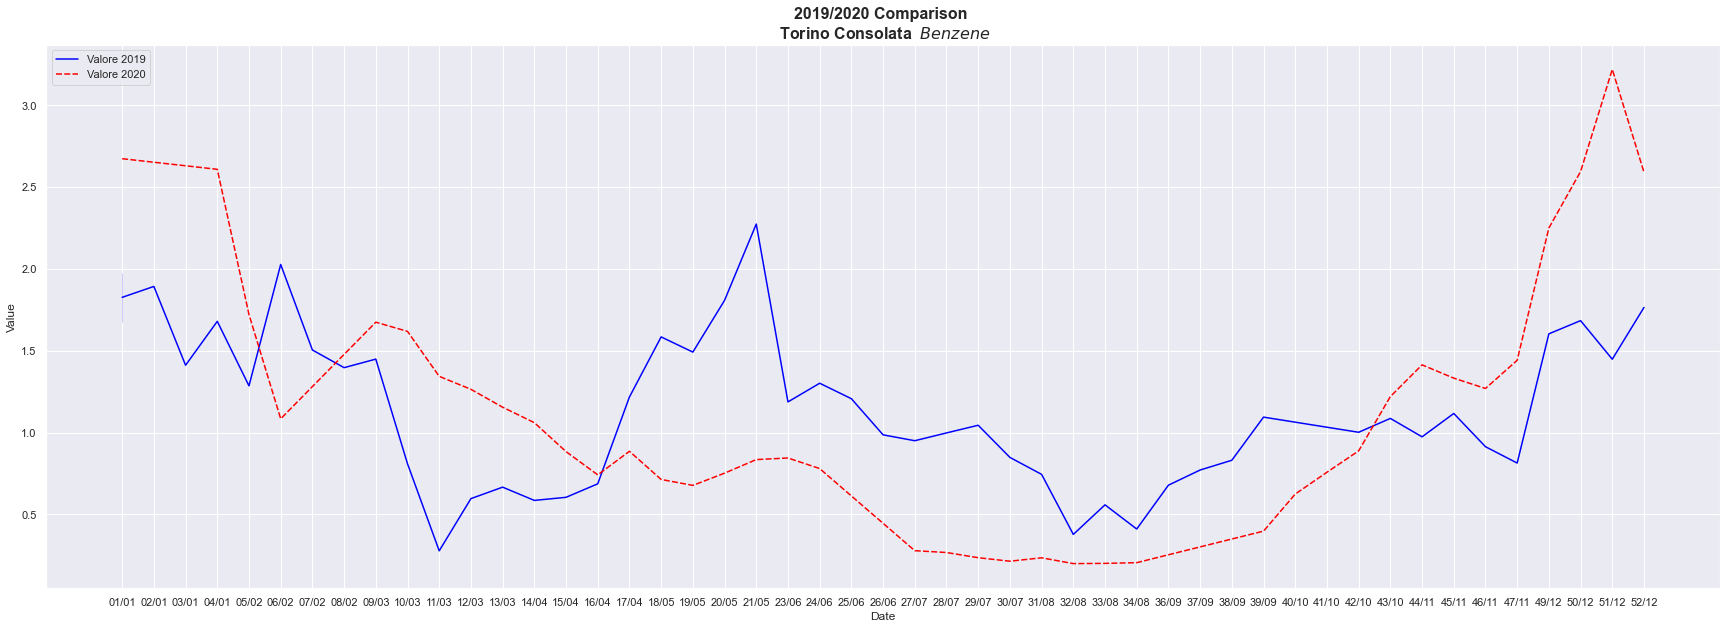

In [68]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_benzene, palette=palette)
plt.title("2019/2020 Comparison \n Torino Consolata  $Benzene$",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Date')
plt.ylabel('Value')

# 2020 - Grouped By All Stations

## PM10

In [69]:
consolata_pm10_2020=get_daily_adjusted_data('data/ARPA/PM10/Consolata/Torino-Consolata_Polveri-sottili','2020')
rebaudengo_pm10_2020 = get_daily_adjusted_data('data/ARPA/PM10/Rebaudengo/Torino-Rebaudengo_Polveri-sottili','2020')
lingotto_pm10_2020 = get_daily_adjusted_data('data/ARPA/PM10/Lingotto/Torino-Lingotto_Polveri-sottili','2020')
rubino_pm10_2020 = get_daily_adjusted_data('data/ARPA/PM10/Rubino/Torino-Rubino_Polveri-sottili','2020')
grassi_pm10_2020 =get_daily_adjusted_data('data/ARPA/PM10/Grassi/Torino-Grassi_Polveri-sottili','2020')
avg_turin_pm10_2020=pd.concat([rebaudengo_pm10_2020,consolata_pm10_2020,lingotto_pm10_2020,rubino_pm10_2020,grassi_pm10_2020]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_pm10_2020.rename(columns = {'Valore':'PM10'}, inplace = True)

### Descriptive Statistics

In [70]:
avg_turin_pm10_2020.describe(include=[float])

,PM10
count,366.000000
mean,-10.466083
std,38.409984
min,-80.624788
25%,-40.789040
50%,-14.359437
75%,14.449587
max,116.047433


[]

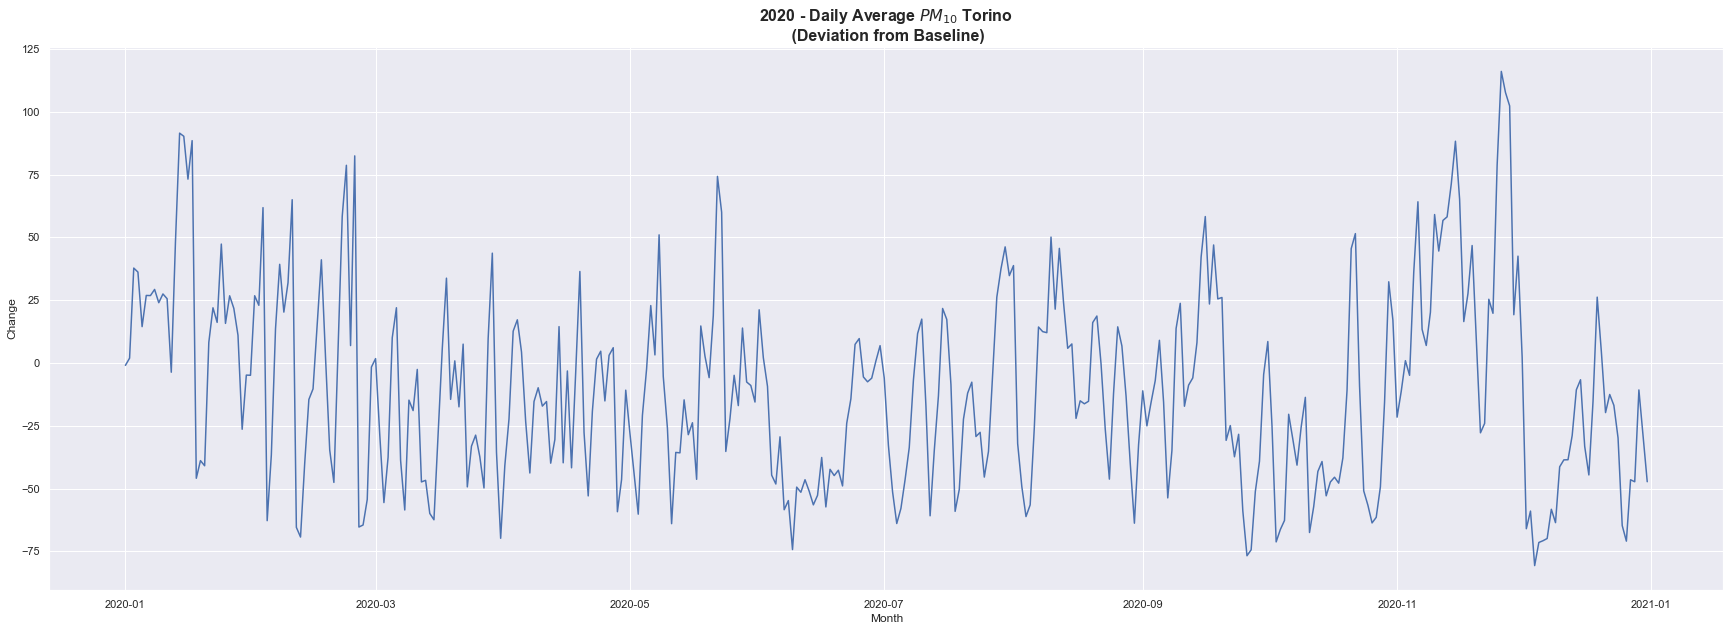

In [71]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_pm10_2020, x="Data rilevamento", y="PM10")
plt.title("2020 - Daily Average $PM_{10}$ Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Month')
plt.ylabel('Change')
plt.plot()

## NOX

In [72]:
consolata_nox_2020=get_daily_adjusted_data('data/ARPA/NOx/Consolata/Torino-Consolata_Gas','2020')
rebaudengo_nox_2020 = get_daily_adjusted_data('data/ARPA/NOx/Rebaudengo/Torino-Rebaudengo_Gas','2020')
lingotto_nox_2020 = get_daily_adjusted_data('data/ARPA/NOx/Lingotto/Torino-Lingotto_Gas','2020')
rubino_nox_2020 = get_daily_adjusted_data('data/ARPA/NOx/Rubino/Torino-Rubino_Gas','2020')
avg_turin_nox_2020=pd.concat([consolata_nox_2020,rebaudengo_nox_2020,lingotto_nox_2020,rubino_nox_2020]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_nox_2020.rename(columns = {'Valore':'NOx'}, inplace = True)


### Descriptive Statistics

In [73]:
avg_turin_nox_2020.describe(include=[float])

,NOx
count,366.000000
mean,-29.998551
std,28.200089
min,-82.082734
25%,-50.855938
50%,-30.952211
75%,-16.950701
max,58.724350


[]

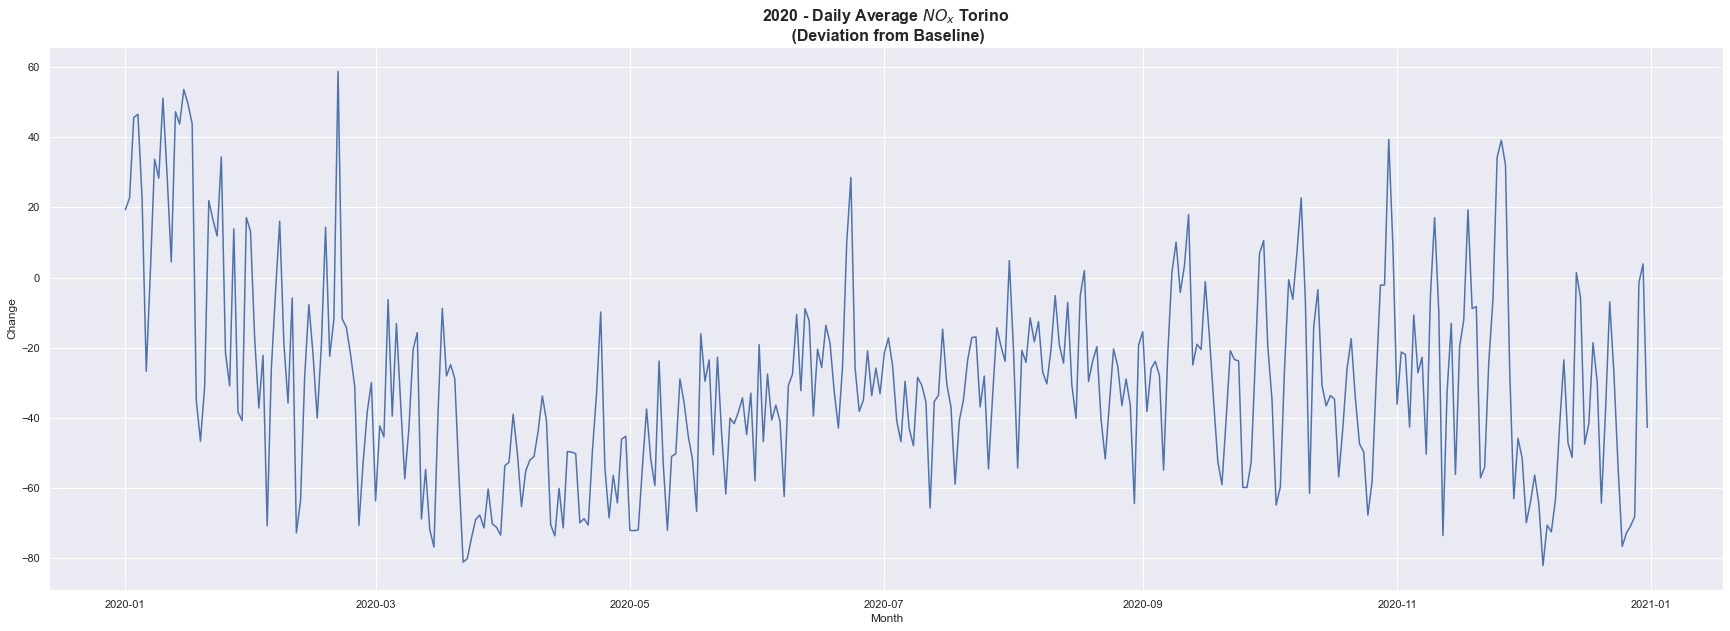

In [74]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_nox_2020, x="Data rilevamento", y="NOx")
plt.title("2020 - Daily Average $NO_{x}$ Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Month')
plt.ylabel('Change')
plt.plot()

## NO

In [75]:
consolata_no_2020 = get_daily_adjusted_data('data/ARPA/NO/Consolata/Torino-Consolata_Monossido','2020')
rebaudengo_no_2020 = get_daily_adjusted_data('data/ARPA/NO/Rebaudengo/Torino-Rebaudengo_Monossido','2020')
lingotto_no_2020 = get_daily_adjusted_data('data/ARPA/NO/Lingotto/Torino-Lingotto_Monossido','2020')
rubino_no_2020 = get_daily_adjusted_data('data/ARPA/NO/Rubino/Torino-Rubino_Monossido','2020')
avg_turin_no_2020 = pd.concat([consolata_no_2020,rebaudengo_no_2020,lingotto_no_2020,rubino_no_2020]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_no_2020.rename(columns = {'Valore':'NO'}, inplace = True)


### Descriptive Statistics

In [76]:
avg_turin_no_2020.describe(include=[float])

,NO
count,366.000000
mean,-39.712211
std,35.326706
min,-90.924379
25%,-64.701406
50%,-47.741061
75%,-24.146897
max,88.672804


[]

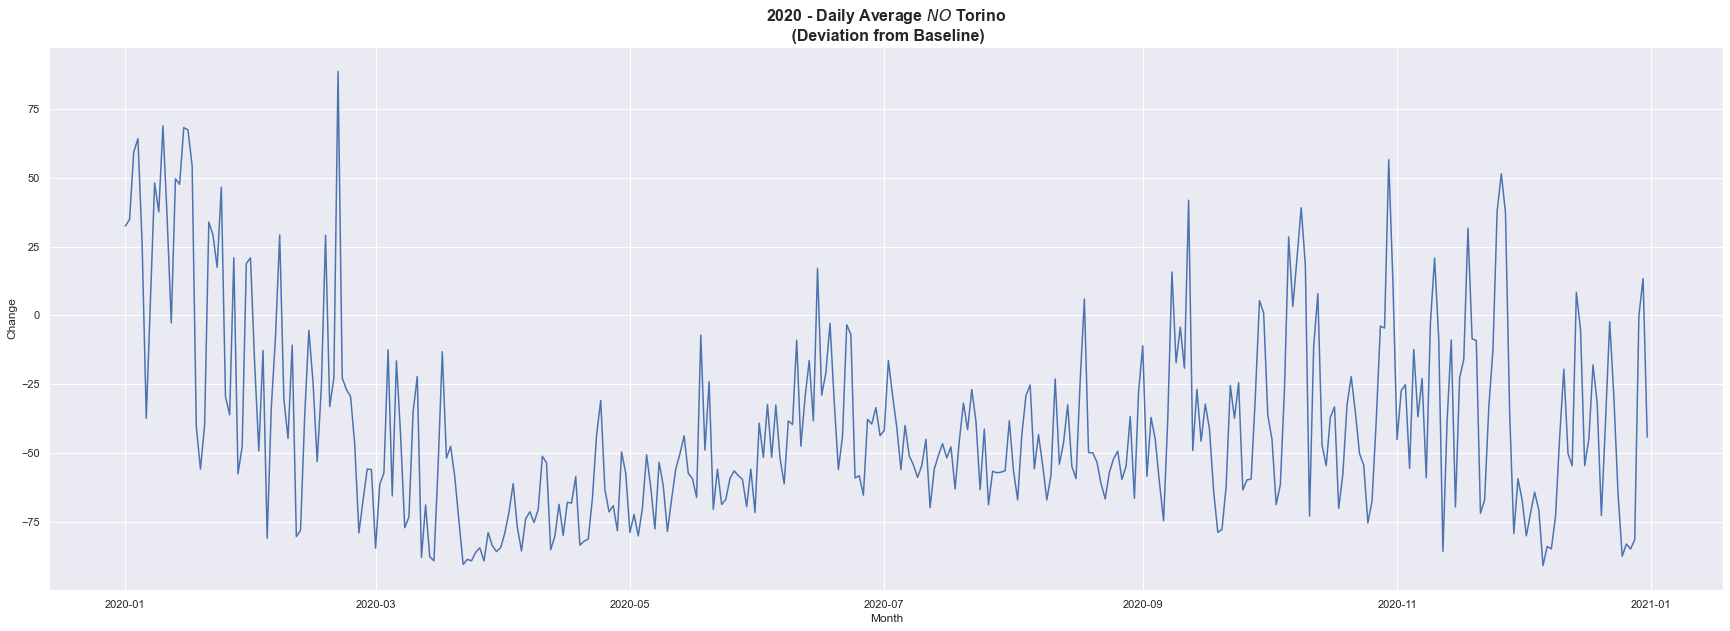

In [77]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_no_2020, x="Data rilevamento", y="NO")
plt.title("2020 - Daily Average $NO$ Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Month')
plt.ylabel('Change')
plt.plot()

## NO2

In [78]:
consolata_no2_2020 = get_daily_adjusted_data('data/ARPA/NO2/Consolata/Torino-Consolata_Biossido','2020')
rebaudengo_no2_2020 = get_daily_adjusted_data('data/ARPA/NO2/Rebaudengo/Torino-Rebaudengo_Biossido','2020')
lingotto_no2_2020 = get_daily_adjusted_data('data/ARPA/NO2/Lingotto/Torino-Lingotto_Biossido','2020')
rubino_no2_2020 = get_daily_adjusted_data('data/ARPA/NO2/Rubino/Torino-Rubino_Biossido','2020')
avg_turin_no2_2020 = pd.concat([consolata_no2_2020,rebaudengo_no2_2020,lingotto_no2_2020,rubino_no2_2020]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_no2_2020.rename(columns = {'Valore':'NO2'}, inplace = True)


### Descriptive Statistics

In [79]:
avg_turin_no2_2020.describe(include=[float])

,NO2
count,366.000000
mean,-27.226321
std,20.599515
min,-75.411630
25%,-41.992621
50%,-25.584277
75%,-13.228172
max,42.886889


[]

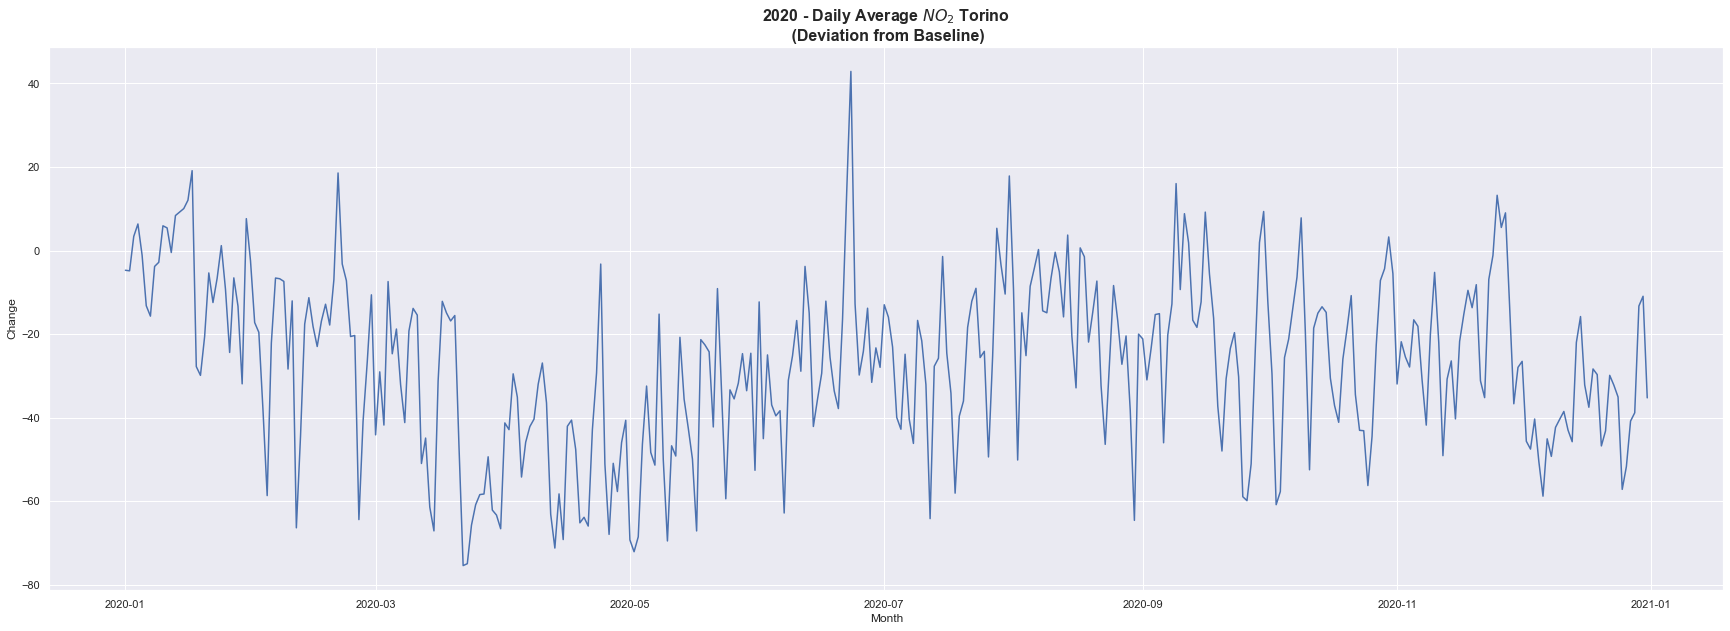

In [80]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_no2_2020, x="Data rilevamento", y="NO2")
plt.title("2020 - Daily Average $NO_{2}$ Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Month')
plt.ylabel('Change')
plt.plot()

## Benzene

In [81]:
consolata_bnz_2020 = get_daily_adjusted_data('data/ARPA/Benzene/Consolata/Torino-Consolata_Idrocarburi-aromatici','2020')
rebaudengo_bnz_2020 = get_daily_adjusted_data('data/ARPA/Benzene/Rebaudengo/Torino-Rebaudengo_Idrocarburi-aromatici','2020')
lingotto_bnz_2020 = get_daily_adjusted_data('data/ARPA/Benzene/Lingotto/Torino-Lingotto_Idrocarburi-aromatici','2020')
rubino_bnz_2020 = get_daily_adjusted_data('data/ARPA/Benzene/Rubino/Torino-Rubino_Idrocarburi-aromatici','2020')
avg_turin_bnz_2020  =pd.concat([consolata_bnz_2020,rebaudengo_bnz_2020,lingotto_bnz_2020,rubino_bnz_2020]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_bnz_2020.rename(columns = {'Valore':'Benzene'}, inplace = True)


### Descriptive Statistics

In [82]:
avg_turin_bnz_2020.describe(include=[float])

,Benzene
count,366.000000
mean,-32.970279
std,21.585336
min,-78.280266
25%,-48.358521
50%,-36.424142
75%,-21.689958
max,45.595930


[]

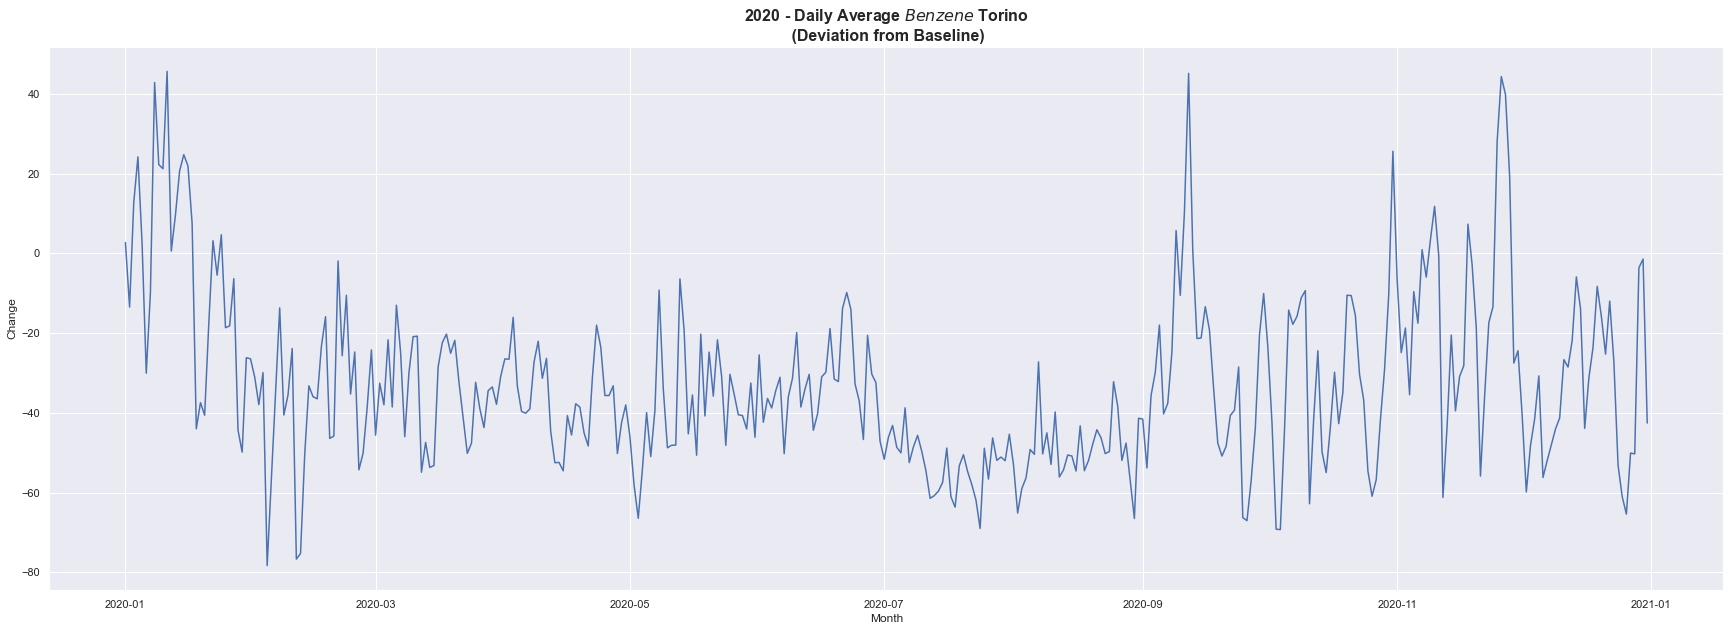

In [83]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_bnz_2020, x="Data rilevamento", y="Benzene")
plt.title("2020 - Daily Average $Benzene$ Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Month')
plt.ylabel('Change')
plt.plot()

# 2021 - Grouped By All Stations

## PM10

In [84]:
consolata_pm10_2021=get_daily_adjusted_data('data/ARPA/PM10/Consolata/Torino-Consolata_Polveri-sottili','2021')
rebaudengo_pm10_2021 = get_daily_adjusted_data('data/ARPA/PM10/Rebaudengo/Torino-Rebaudengo_Polveri-sottili','2021')
lingotto_pm10_2021 = get_daily_adjusted_data('data/ARPA/PM10/Lingotto/Torino-Lingotto_Polveri-sottili','2021')
rubino_pm10_2021 = get_daily_adjusted_data('data/ARPA/PM10/Rubino/Torino-Rubino_Polveri-sottili','2021')
grassi_pm10_2021 =get_daily_adjusted_data('data/ARPA/PM10/Grassi/Torino-Grassi_Polveri-sottili','2021')
avg_turin_pm10_2021=pd.concat([rebaudengo_pm10_2021,consolata_pm10_2021,lingotto_pm10_2021,rubino_pm10_2021,grassi_pm10_2021]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_pm10_2021.rename(columns = {'Valore':'PM10'}, inplace = True)

### Descriptive Statistics

In [85]:
avg_turin_pm10_2021.describe(include=[float])

,PM10
count,364.000000
mean,-12.603017
std,38.116035
min,-81.859627
25%,-38.087465
50%,-18.033566
75%,8.741785
max,192.462676


[]

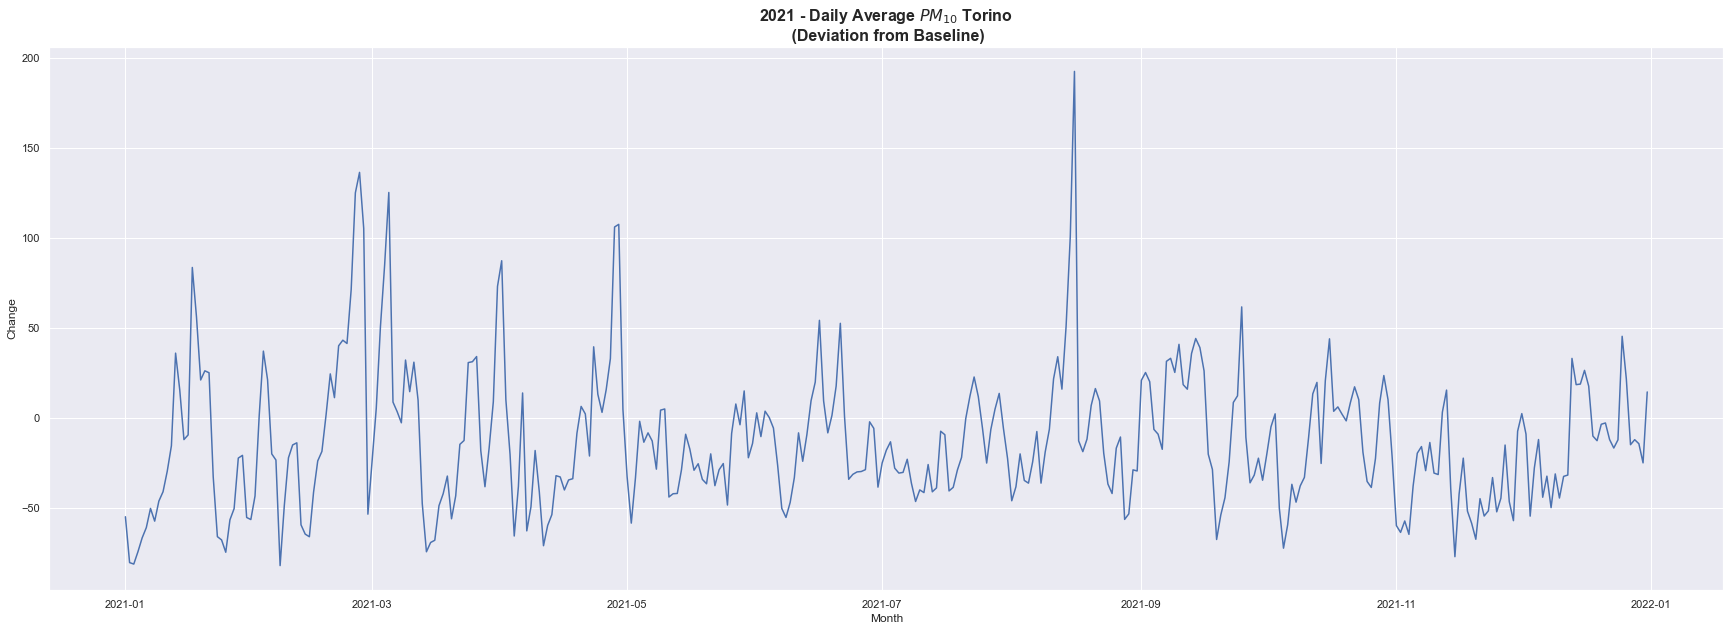

In [86]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_pm10_2021, x="Data rilevamento", y="PM10")
plt.title("2021 - Daily Average $PM_{10}$ Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Month')
plt.ylabel('Change')
plt.plot()

## NOX

In [87]:
consolata_nox_2021 = get_daily_adjusted_data('data/ARPA/NOx/Consolata/Torino-Consolata_Gas','2021')
rubino_nox_2021 = get_daily_adjusted_data('data/ARPA/NOx/Rubino/Torino-Rubino_Gas','2021')
avg_turin_nox_2021 = pd.concat([consolata_nox_2021,rubino_nox_2021]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_nox_2021.rename(columns = {'Valore':'NOx'}, inplace = True)


### Descriptive Statistics

In [88]:
avg_turin_nox_2021.describe(include=[float])

,NOx
count,364.000000
mean,-36.800309
std,22.982007
min,-84.089801
25%,-51.566192
50%,-39.458667
75%,-24.266974
max,69.409315


[]

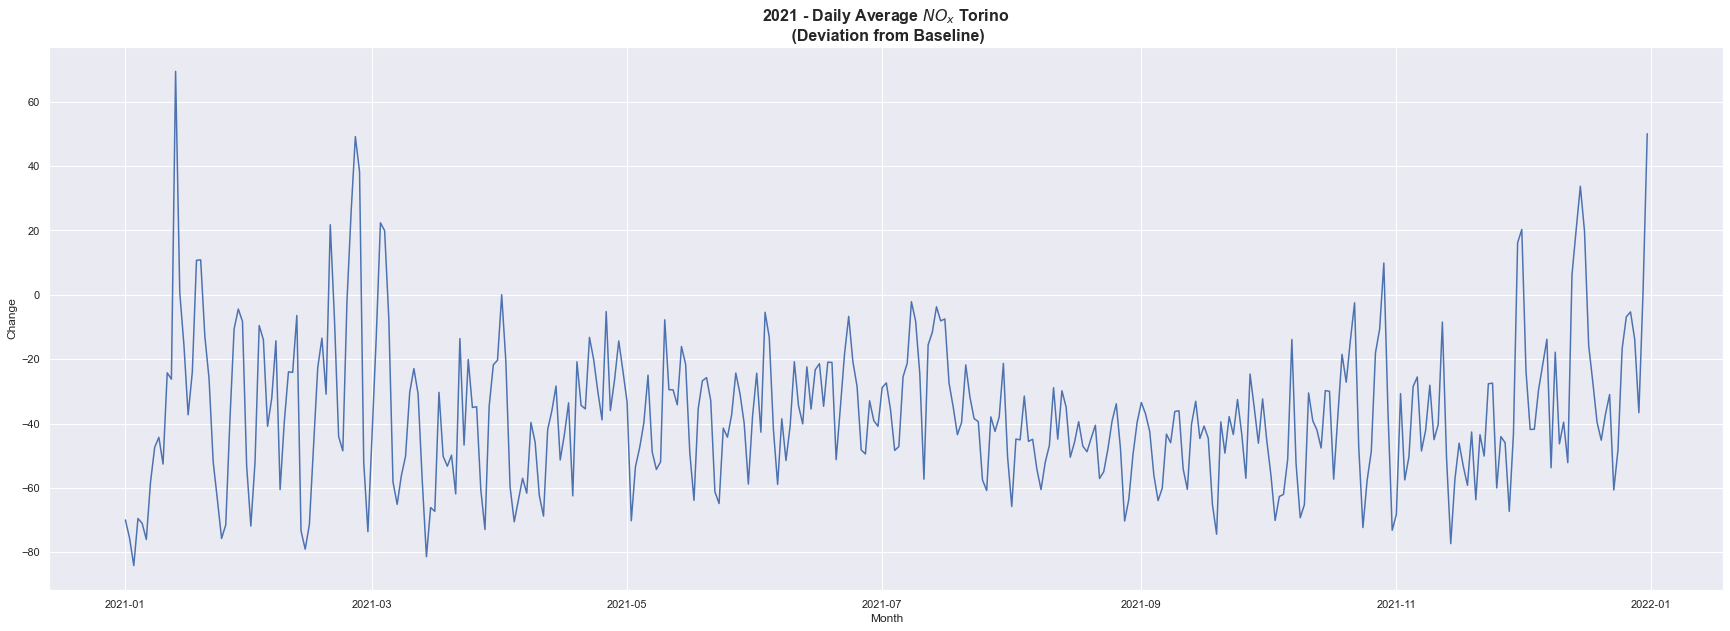

In [89]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_nox_2021, x="Data rilevamento", y="NOx")
plt.title("2021 - Daily Average $NO_{x}$ Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Month')
plt.ylabel('Change')
plt.plot()

## NO

In [90]:
consolata_no_2021 = get_daily_adjusted_data('data/ARPA/NO/Consolata/Torino-Consolata_Monossido','2021')
rebaudengo_no_2021 = get_daily_adjusted_data('data/ARPA/NO/Rebaudengo/Torino-Rebaudengo_Monossido','2021')
lingotto_no_2021 = get_daily_adjusted_data('data/ARPA/NO/Lingotto/Torino-Lingotto_Monossido','2021')
rubino_no_2021 = get_daily_adjusted_data('data/ARPA/NO/Rubino/Torino-Rubino_Monossido','2021')
avg_turin_no_2021 = pd.concat([consolata_no_2021,rebaudengo_no_2021,lingotto_no_2021,rubino_no_2021]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_no_2021.rename(columns = {'Valore':'NO'}, inplace = True)


### Descriptive Statistics

In [91]:
avg_turin_no_2021.describe(include=[float])

,NO
count,364.000000
mean,-44.320305
std,30.443043
min,-90.727144
25%,-65.937278
50%,-50.819527
75%,-30.742970
max,100.101497


[]

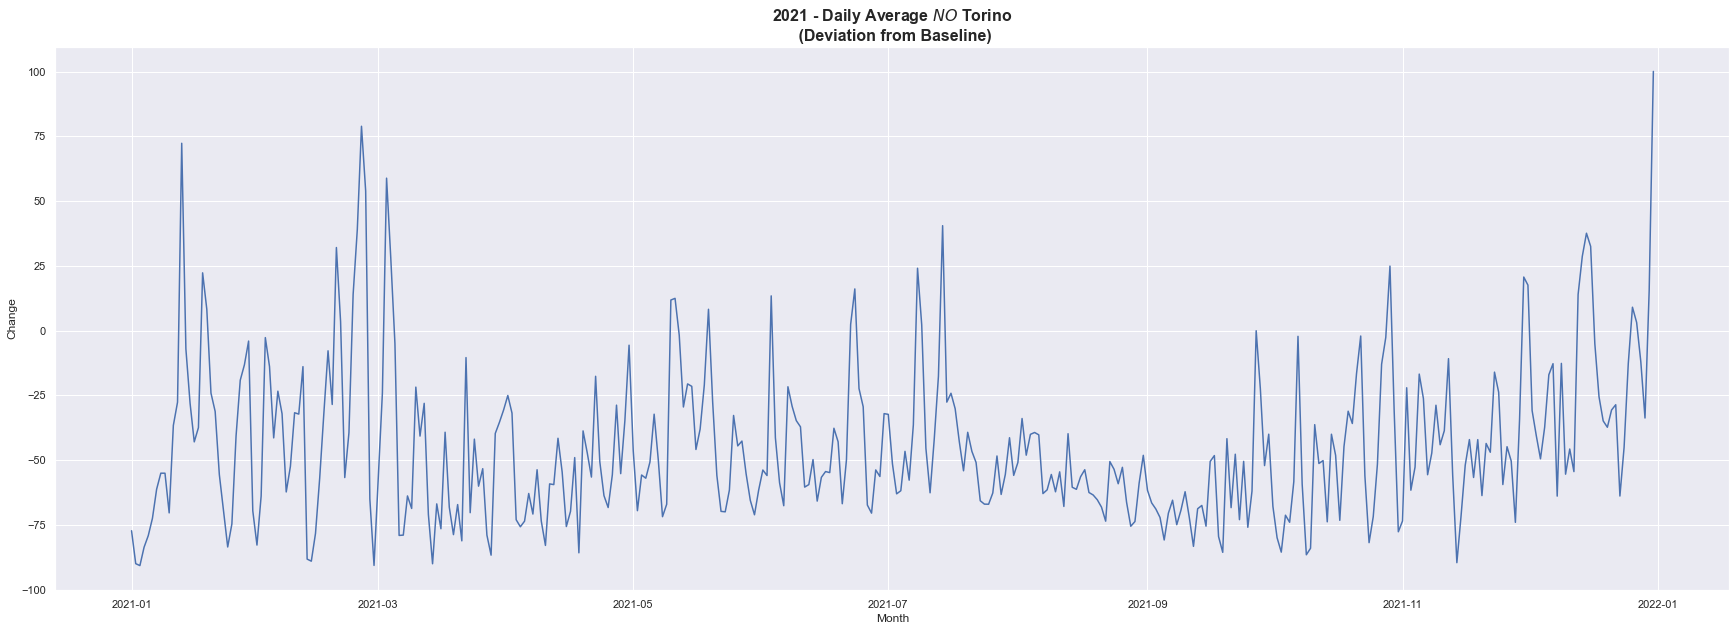

In [92]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_no_2021, x="Data rilevamento", y="NO")
plt.title("2021 - Daily Average $NO$ Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Month')
plt.ylabel('Change')
plt.plot()

## NO2

In [93]:
consolata_no2_2021 = get_daily_adjusted_data('data/ARPA/NO2/Consolata/Torino-Consolata_Biossido','2021')
rebaudengo_no2_2021 = get_daily_adjusted_data('data/ARPA/NO2/Rebaudengo/Torino-Rebaudengo_Biossido','2021')
lingotto_no2_2021 = get_daily_adjusted_data('data/ARPA/NO2/Lingotto/Torino-Lingotto_Biossido','2021')
rubino_no2_2021 = get_daily_adjusted_data('data/ARPA/NO2/Rubino/Torino-Rubino_Biossido','2021')
avg_turin_no2_2021 = pd.concat([consolata_no2_2021,rebaudengo_no2_2021,lingotto_no2_2021,rubino_no2_2021]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_no2_2021.rename(columns = {'Valore':'NO2'}, inplace = True)


### Descriptive Statistics

In [94]:
avg_turin_no2_2021.describe(include=[float])

,NO2
count,364.000000
mean,-26.863225
std,16.936524
min,-71.011034
25%,-37.946146
50%,-28.128694
75%,-14.684131
max,35.616556


[]

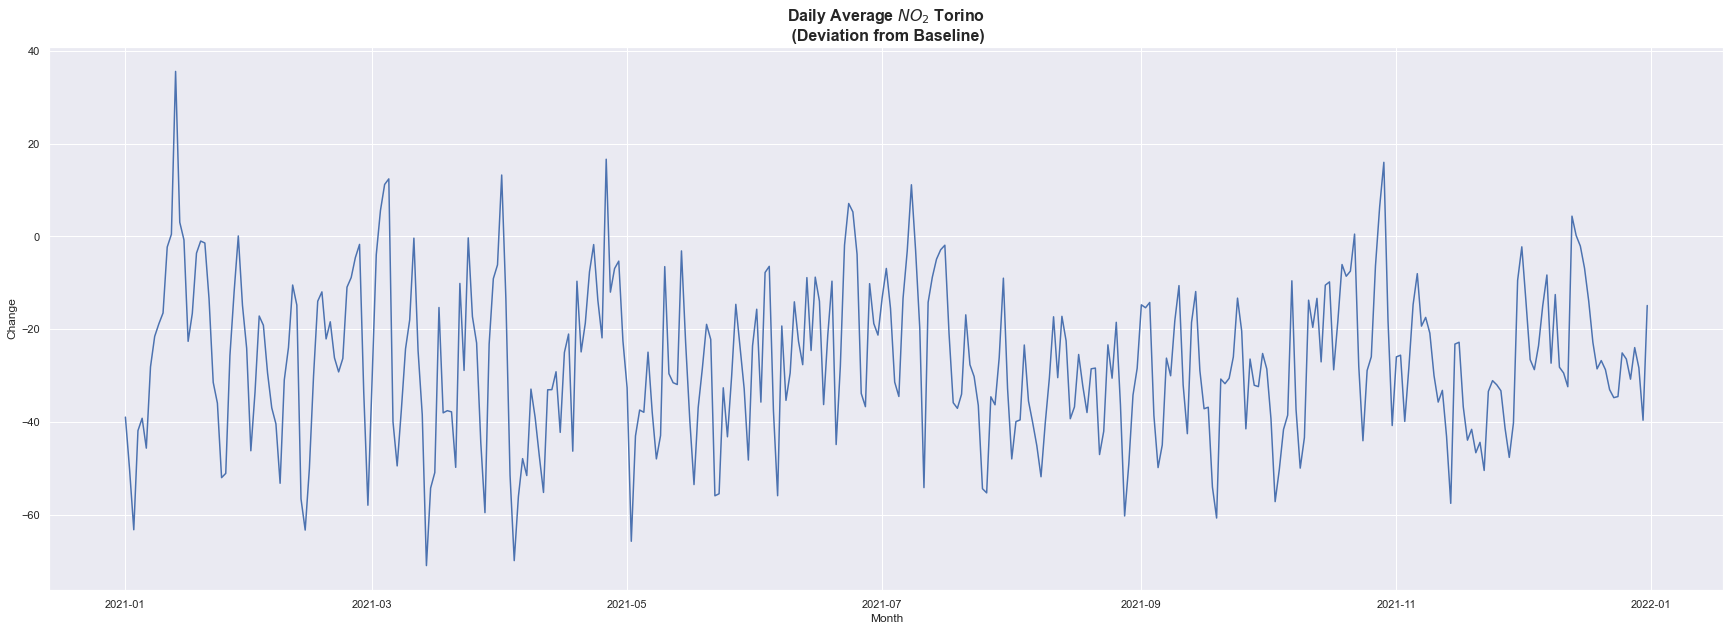

In [95]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_no2_2021, x="Data rilevamento", y="NO2")
plt.title("Daily Average $NO_{2}$ Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Month')
plt.ylabel('Change')
plt.plot()

## Benzene

In [96]:
consolata_bnz_2021 = get_daily_adjusted_data('data/ARPA/Benzene/Consolata/Torino-Consolata_Idrocarburi-aromatici','2021')
rebaudengo_bnz_2021 = get_daily_adjusted_data('data/ARPA/Benzene/Rebaudengo/Torino-Rebaudengo_Idrocarburi-aromatici','2021')
lingotto_bnz_2021 = get_daily_adjusted_data('data/ARPA/Benzene/Lingotto/Torino-Lingotto_Idrocarburi-aromatici','2021')
rubino_bnz_2021 = get_daily_adjusted_data('data/ARPA/Benzene/Rubino/Torino-Rubino_Idrocarburi-aromatici','2021')
avg_turin_bnz_2021 = pd.concat([consolata_bnz_2021,rebaudengo_bnz_2021,lingotto_bnz_2021,rubino_bnz_2021]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_bnz_2021.rename(columns = {'Valore':'Benzene'}, inplace = True)


### Descriptive Statistics

In [97]:
avg_turin_bnz_2021.describe(include=[float])

,Benzene
count,364.000000
mean,-33.299540
std,21.518877
min,-72.627872
25%,-47.760639
50%,-38.325936
75%,-22.019815
max,69.300252


[]

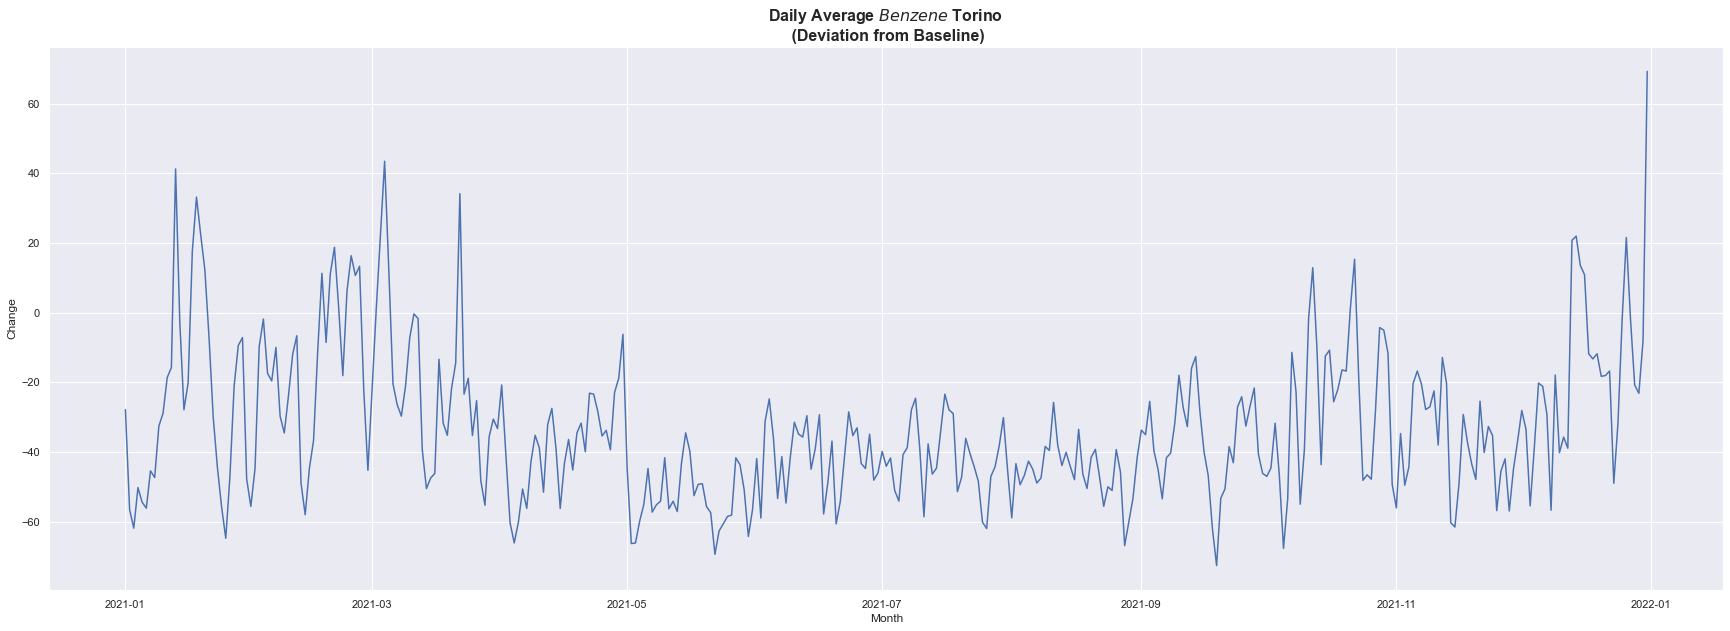

In [98]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_bnz_2021, x="Data rilevamento", y="Benzene")
plt.title("Daily Average $Benzene$ Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Month')
plt.ylabel('Change')
plt.plot()